# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np

#for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#for randomized data splitting
from sklearn.model_selection import train_test_split

#To build linear regression model
import statsmodels.api as sm

#To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Loading the dataset

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/DSBA/Linear Regression/used_device_data.csv')

In [ ]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


## Data Overview

- Observations
- Sanity checks

In [ ]:
df.shape

(3454, 15)

In [ ]:
df.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

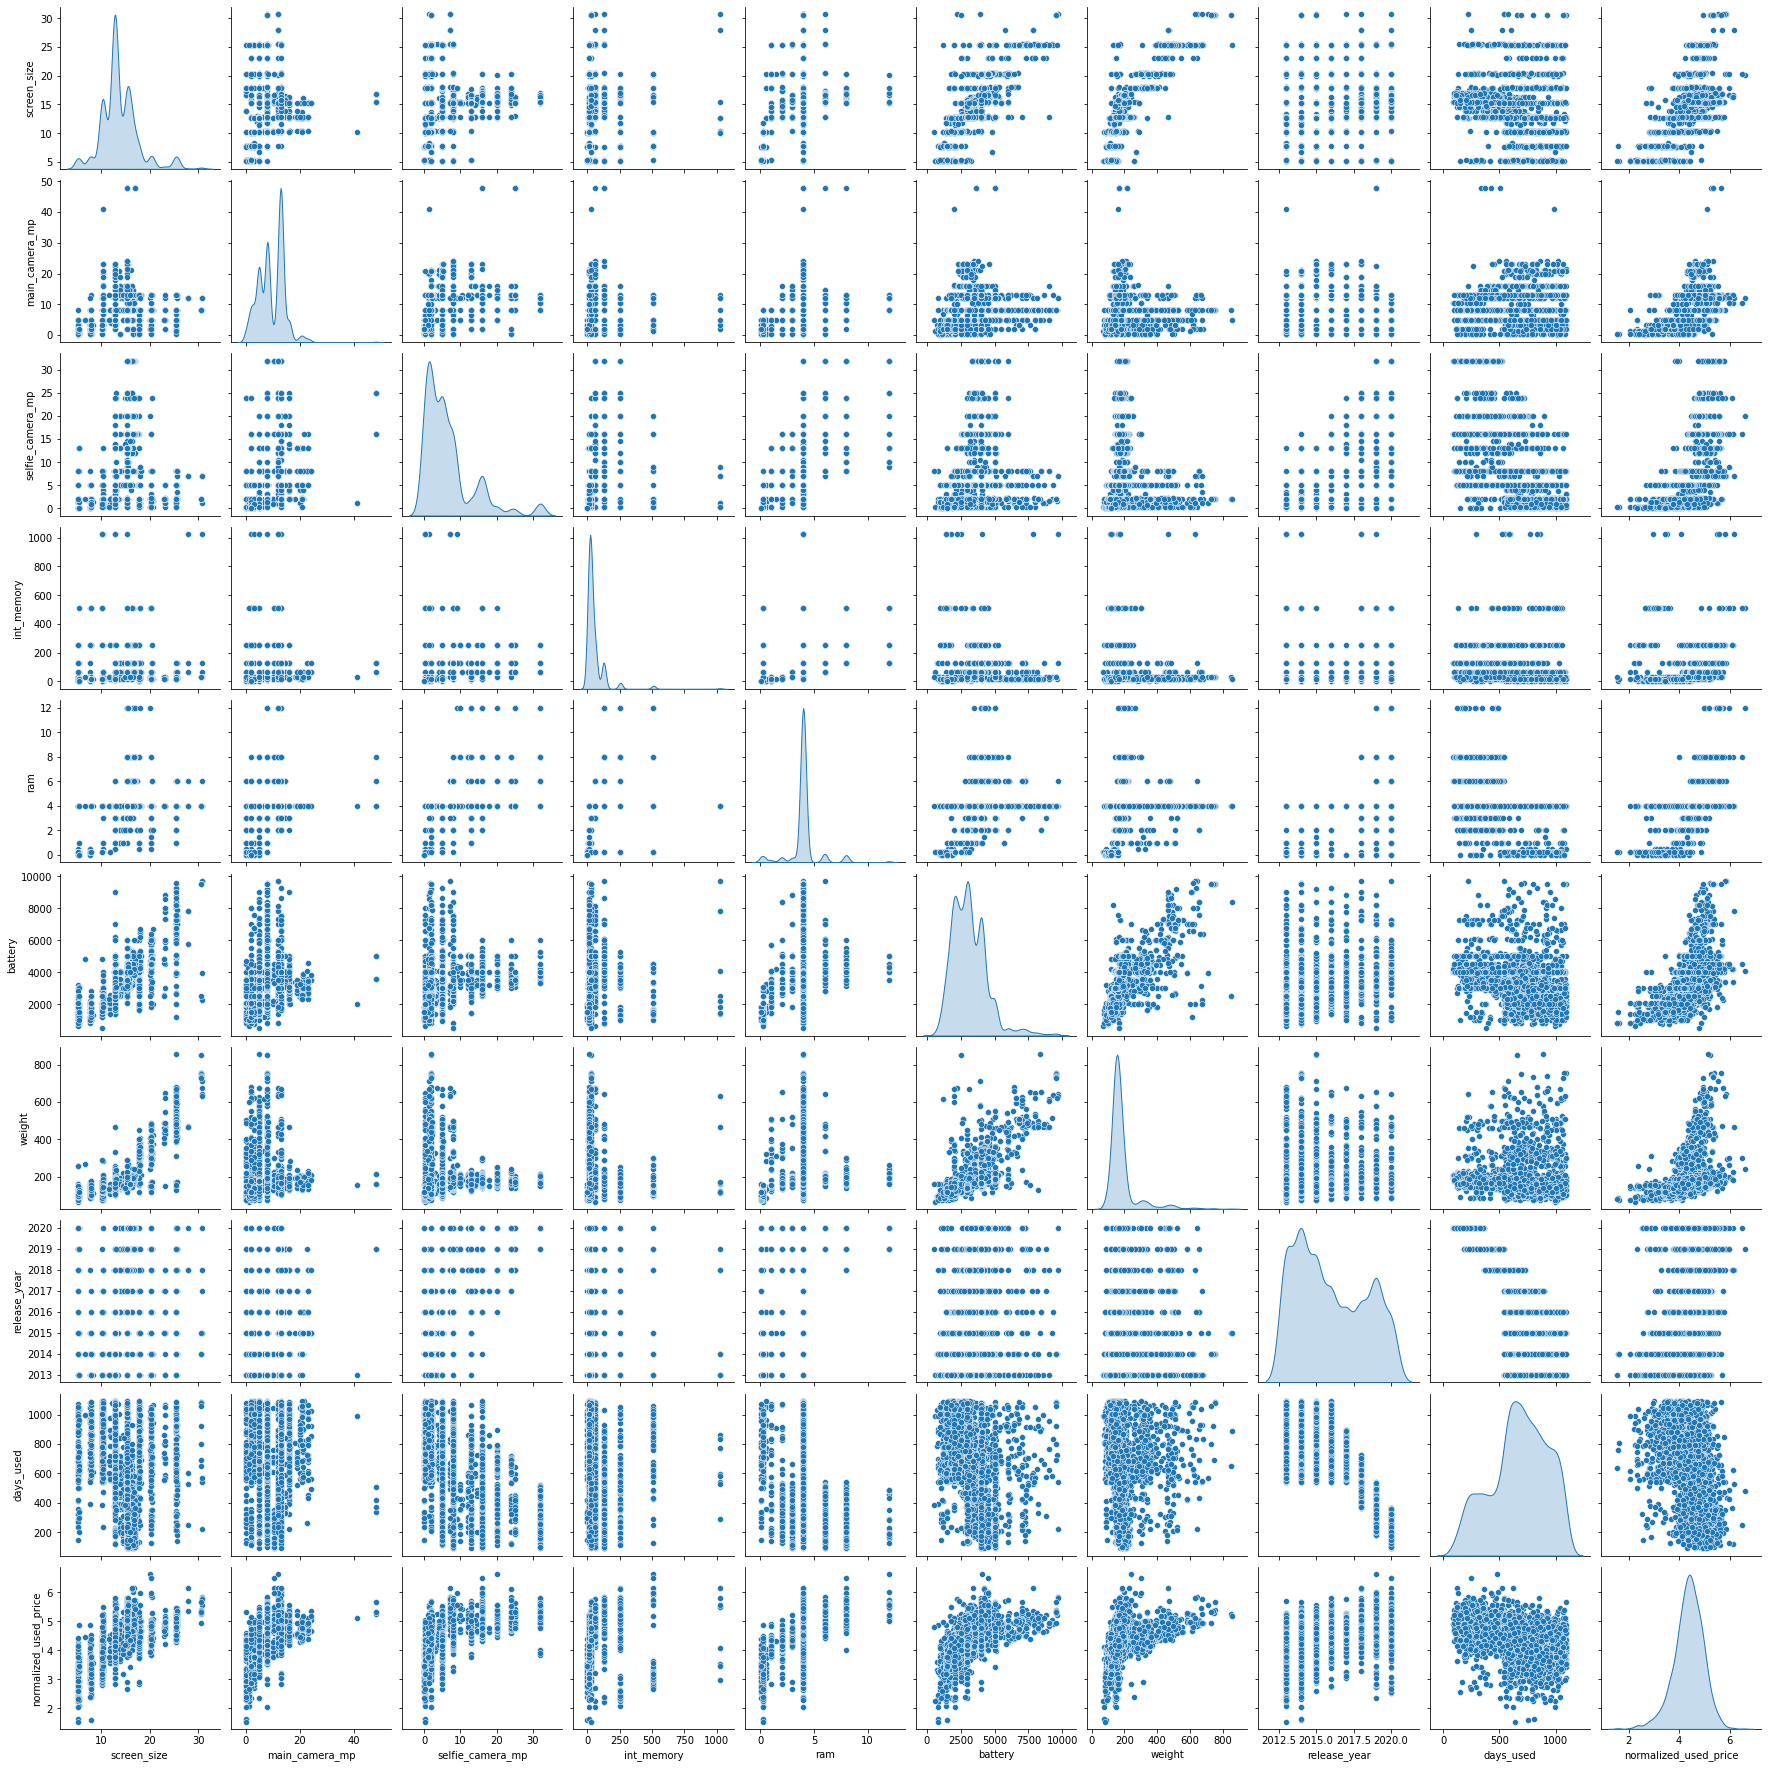

In [ ]:
df_attr = df.iloc[:, 0:14]
sns.pairplot(
    df_attr, diag_kind="kde"
)

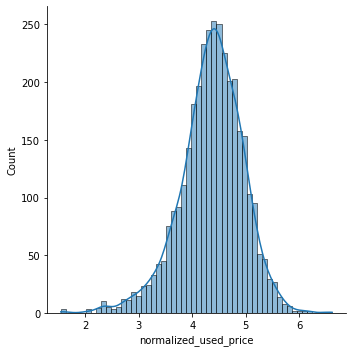

In [ ]:
sns.displot(data=df, x='normalized_used_price',kde=True)

From the distribution plot above, we can see that the distribution of the Normalized used prices is close to being normally distributed but slightly left skewed.

In [ ]:
df['os'].value_counts(normalize=True)*100


Android    93.051534
Others      3.966416
Windows     1.939780
iOS         1.042270
Name: os, dtype: float64

In [ ]:
df['brand_name'].value_counts(normalize=True)*100

Others        14.533874
Samsung        9.872611
Huawei         7.266937
LG             5.819340
Lenovo         4.950782
ZTE            4.053272
Xiaomi         3.821656
Oppo           3.734800
Asus           3.532137
Alcatel        3.503185
Micromax       3.387377
Vivo           3.387377
Honor          3.358425
HTC            3.184713
Nokia          3.068906
Motorola       3.068906
Sony           2.489867
Meizu          1.795020
Gionee         1.621309
Acer           1.476549
XOLO           1.418645
Panasonic      1.360741
Realme         1.187030
Apple          1.129126
Lava           1.042270
Celkon         0.955414
Spice          0.868558
Karbonn        0.839606
Coolpad        0.636943
BlackBerry     0.636943
Microsoft      0.636943
OnePlus        0.636943
Google         0.434279
Infinix        0.289519
Name: brand_name, dtype: float64

The Android os dominates the used device market accounting for 93% of the phones according to the data collected.

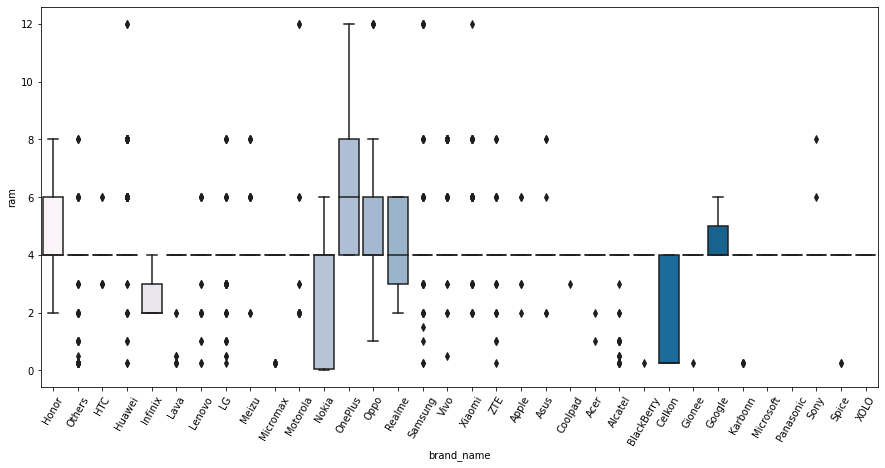

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x="brand_name", y="ram", data=df, palette='PuBu')
plt.xticks(rotation = 60)
plt.show()

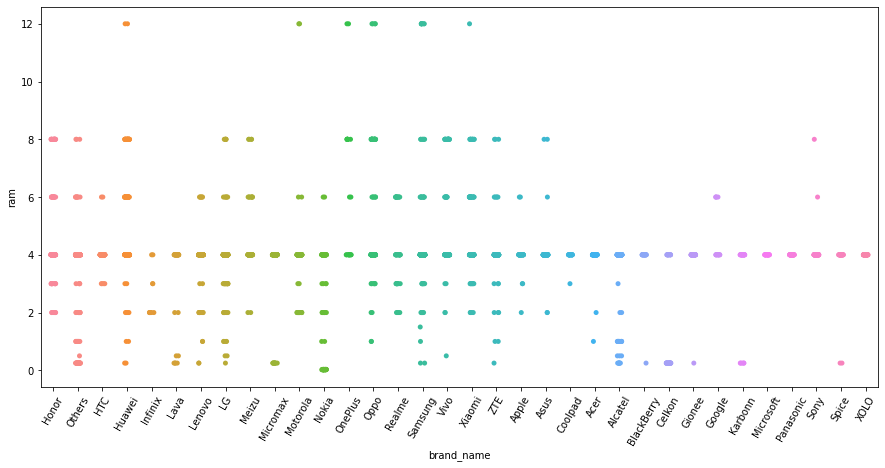

In [ ]:
plt.figure(figsize=(15,7))
sns.stripplot(data=df, x='brand_name', y='ram');
plt.xticks(rotation = 60)
plt.show()

In terms of RAM, most of the brands have phones with 4GB Ram and a few higher end brands have double that such as Huawei,Samsung, ZTE.

In [ ]:
df_heavy = df[df['battery'] > 4500]
df_heavy.shape

(341, 15)

In [ ]:
df_heavy.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,341.000000,287.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,19.766745,9.185540,7.236657,59.260997,4.252199,5858.104106,332.275660,2017.117302,568.436950,4.787414,5.557814
std,4.803179,4.915429,6.290388,87.071400,1.475596,1279.176136,155.501832,2.462249,277.996434,0.350449,0.539383
min,6.680000,0.300000,0.300000,16.000000,1.000000,4520.000000,118.000000,2013.000000,92.000000,3.421000,4.392224
25%,15.420000,5.000000,2.000000,16.000000,4.000000,5000.000000,198.000000,2015.000000,319.000000,4.548494,5.192846
50%,20.320000,8.000000,5.000000,32.000000,4.000000,5100.000000,300.000000,2017.000000,582.000000,4.755313,5.521461
75%,25.430000,13.000000,8.000000,64.000000,4.000000,6660.000000,467.000000,2019.000000,780.000000,4.991996,5.857476
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1089.000000,6.158969,7.090785


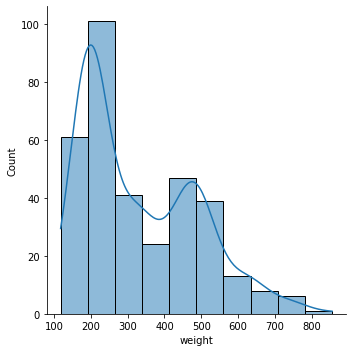

In [ ]:
sns.displot(data=df_heavy, x='weight',kde=True)

The mean weight of devices with batteries over 4500mAh goes up to 332g from the previous mean of the original dataset of 182g. Looking at the distribuiton, a low amount of these phones are below the mean showing that the phones are largely heavier 

In [ ]:
df_screensize = df[df['screen_size'] > 6]
df_screensize.shape

(3362, 15)

From the shape of the dataset, there are 3,362 phones available with a screen size greater than 6 inches

In [ ]:
df_selfiecam = df[df['selfie_camera_mp'] > 8]
df_selfiecam.shape

(655, 15)

<Figure size 1080x504 with 0 Axes>

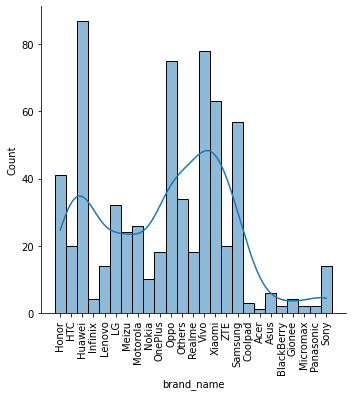

In [ ]:
plt.figure(figsize=(15,7))
sns.displot(data=df_selfiecam, x='brand_name',kde=True)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df.corr()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
screen_size,1.000000,0.150316,0.271640,0.071291,0.274449,0.813533,0.828890,0.364223,-0.291723,0.614785,0.460889
main_camera_mp,0.150316,1.000000,0.429264,0.018766,0.260802,0.248563,-0.087738,0.353728,-0.144672,0.587302,0.541655
selfie_camera_mp,0.271640,0.429264,1.000000,0.296426,0.477411,0.369709,-0.004997,0.690942,-0.552636,0.608074,0.475479
int_memory,0.071291,0.018766,0.296426,1.000000,0.122496,0.117736,0.014948,0.235429,-0.242712,0.190993,0.195992
ram,0.274449,0.260802,0.477411,0.122496,1.000000,0.280740,0.089916,0.314203,-0.280066,0.520289,0.532056
battery,0.813533,0.248563,0.369709,0.117736,0.280740,1.000000,0.703388,0.488660,-0.370895,0.613619,0.470754
weight,0.828890,-0.087738,-0.004997,0.014948,0.089916,0.703388,1.000000,0.071290,-0.067470,0.382354,0.269540
release_year,0.364223,0.353728,0.690942,0.235429,0.314203,0.488660,0.071290,1.000000,-0.750390,0.509790,0.303689
days_used,-0.291723,-0.144672,-0.552636,-0.242712,-0.280066,-0.370895,-0.067470,-0.750390,1.000000,-0.358264,-0.216625
normalized_used_price,0.614785,0.587302,0.608074,0.190993,0.520289,0.613619,0.382354,0.509790,-0.358264,1.000000,0.834496


From the correlation values calculated above, we can see that the normalized used price is most highly correlated with the Screen size, battery and selfie camera with all those being above 60% correlation.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

,Count,Percentage
main_camera_mp,179,5.182397
selfie_camera_mp,2,0.057904
int_memory,4,0.115808
ram,4,0.115808
battery,6,0.173712
weight,7,0.202664


In terms of missing values, there are 6 columns which are missing values with Main camera missing the highest percentage. Missing values will be treated through the mean of each column except for battery and weight which will be treated with the median due to the outliers detected below

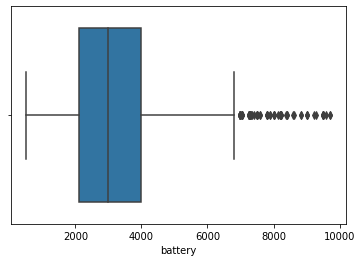

In [ ]:
sns.boxplot(data=df, x='battery')

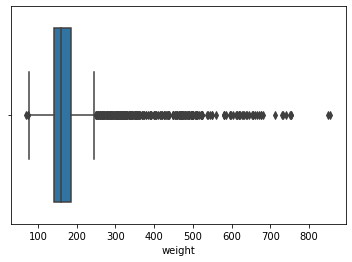

In [ ]:
sns.boxplot(data=df, x='weight')

In [ ]:
df_new = df
df_new['main_camera_mp']=df_new['main_camera_mp'].fillna(df_new['main_camera_mp'].mean())
df_new['selfie_camera_mp']=df_new['selfie_camera_mp'].fillna(df_new['selfie_camera_mp'].mean())
df_new['int_memory']=df_new['int_memory'].fillna(df_new['int_memory'].mean())
df_new['ram']=df_new['ram'].fillna(df_new['ram'].mean())
df_new['battery']=df_new['battery'].fillna(df_new['battery'].median())
df_new['weight']=df_new['weight'].fillna(df_new['weight'].median())
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [ ]:
pd.DataFrame({'Count':df_new.isnull().sum()[df_new.isnull().sum()>0],'Percentage':(df_new.isnull().sum()[df_new.isnull().sum()>0]/df_new.shape[0])*100})

,Count,Percentage


A new dataframe (df_new) has now been created with all the missing values treated. This will be used to proceed with the analysis.

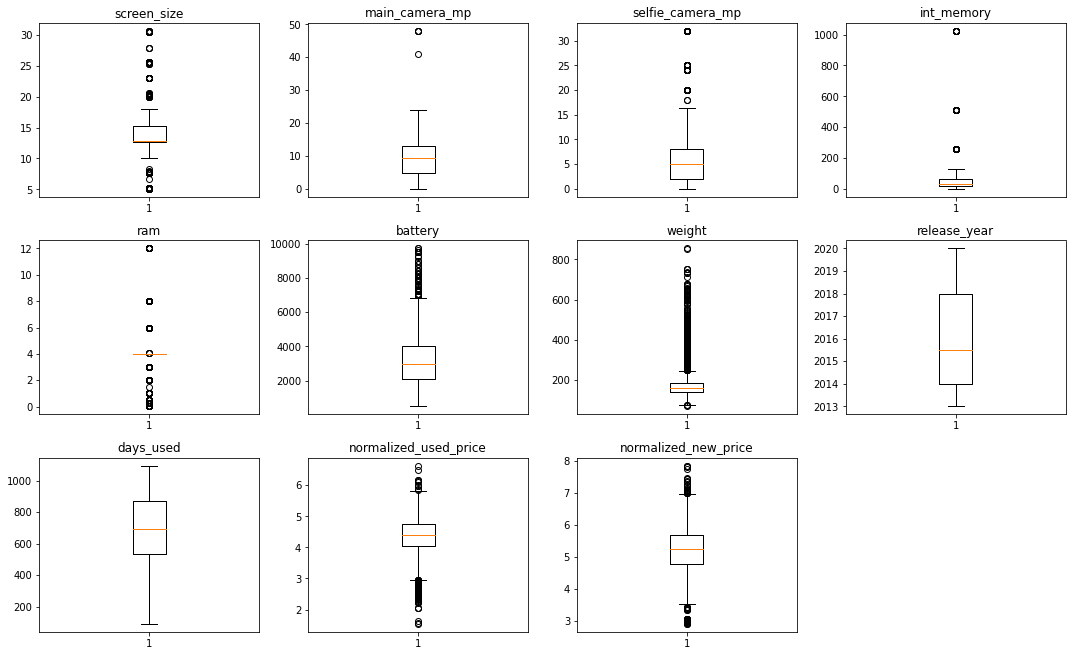

In [ ]:
#outlier detection using boxplots
numeric_columns = ['screen_size','main_camera_mp','selfie_camera_mp','int_memory','ram','battery','weight','release_year','days_used','normalized_used_price','normalized_new_price']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df_new[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

We see quite a few outliers across the different variables. However, we will not be treating them as they are proper values.

In [ ]:
df_new = pd.get_dummies(df_new, columns=['4g','5g'], drop_first=True)
df_new.head() 

,brand_name,os,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,4g_yes,5g_yes
0,Honor,Android,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,1,0
1,Honor,Android,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,1,1
2,Honor,Android,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,1,1
3,Honor,Android,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,1,1
4,Honor,Android,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,1,0


In [ ]:
df_new = pd.get_dummies(df_new, columns=['os'], drop_first=True)
df_new.head() 

,brand_name,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,4g_yes,5g_yes,os_Others,os_Windows,os_iOS
0,Honor,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,1,0,0,0,0
1,Honor,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,1,1,0,0,0
2,Honor,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,1,1,0,0,0
3,Honor,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,1,1,0,0,0
4,Honor,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,1,0,0,0,0


## EDA

- It is a good idea to explore the data once again after manipulating it.

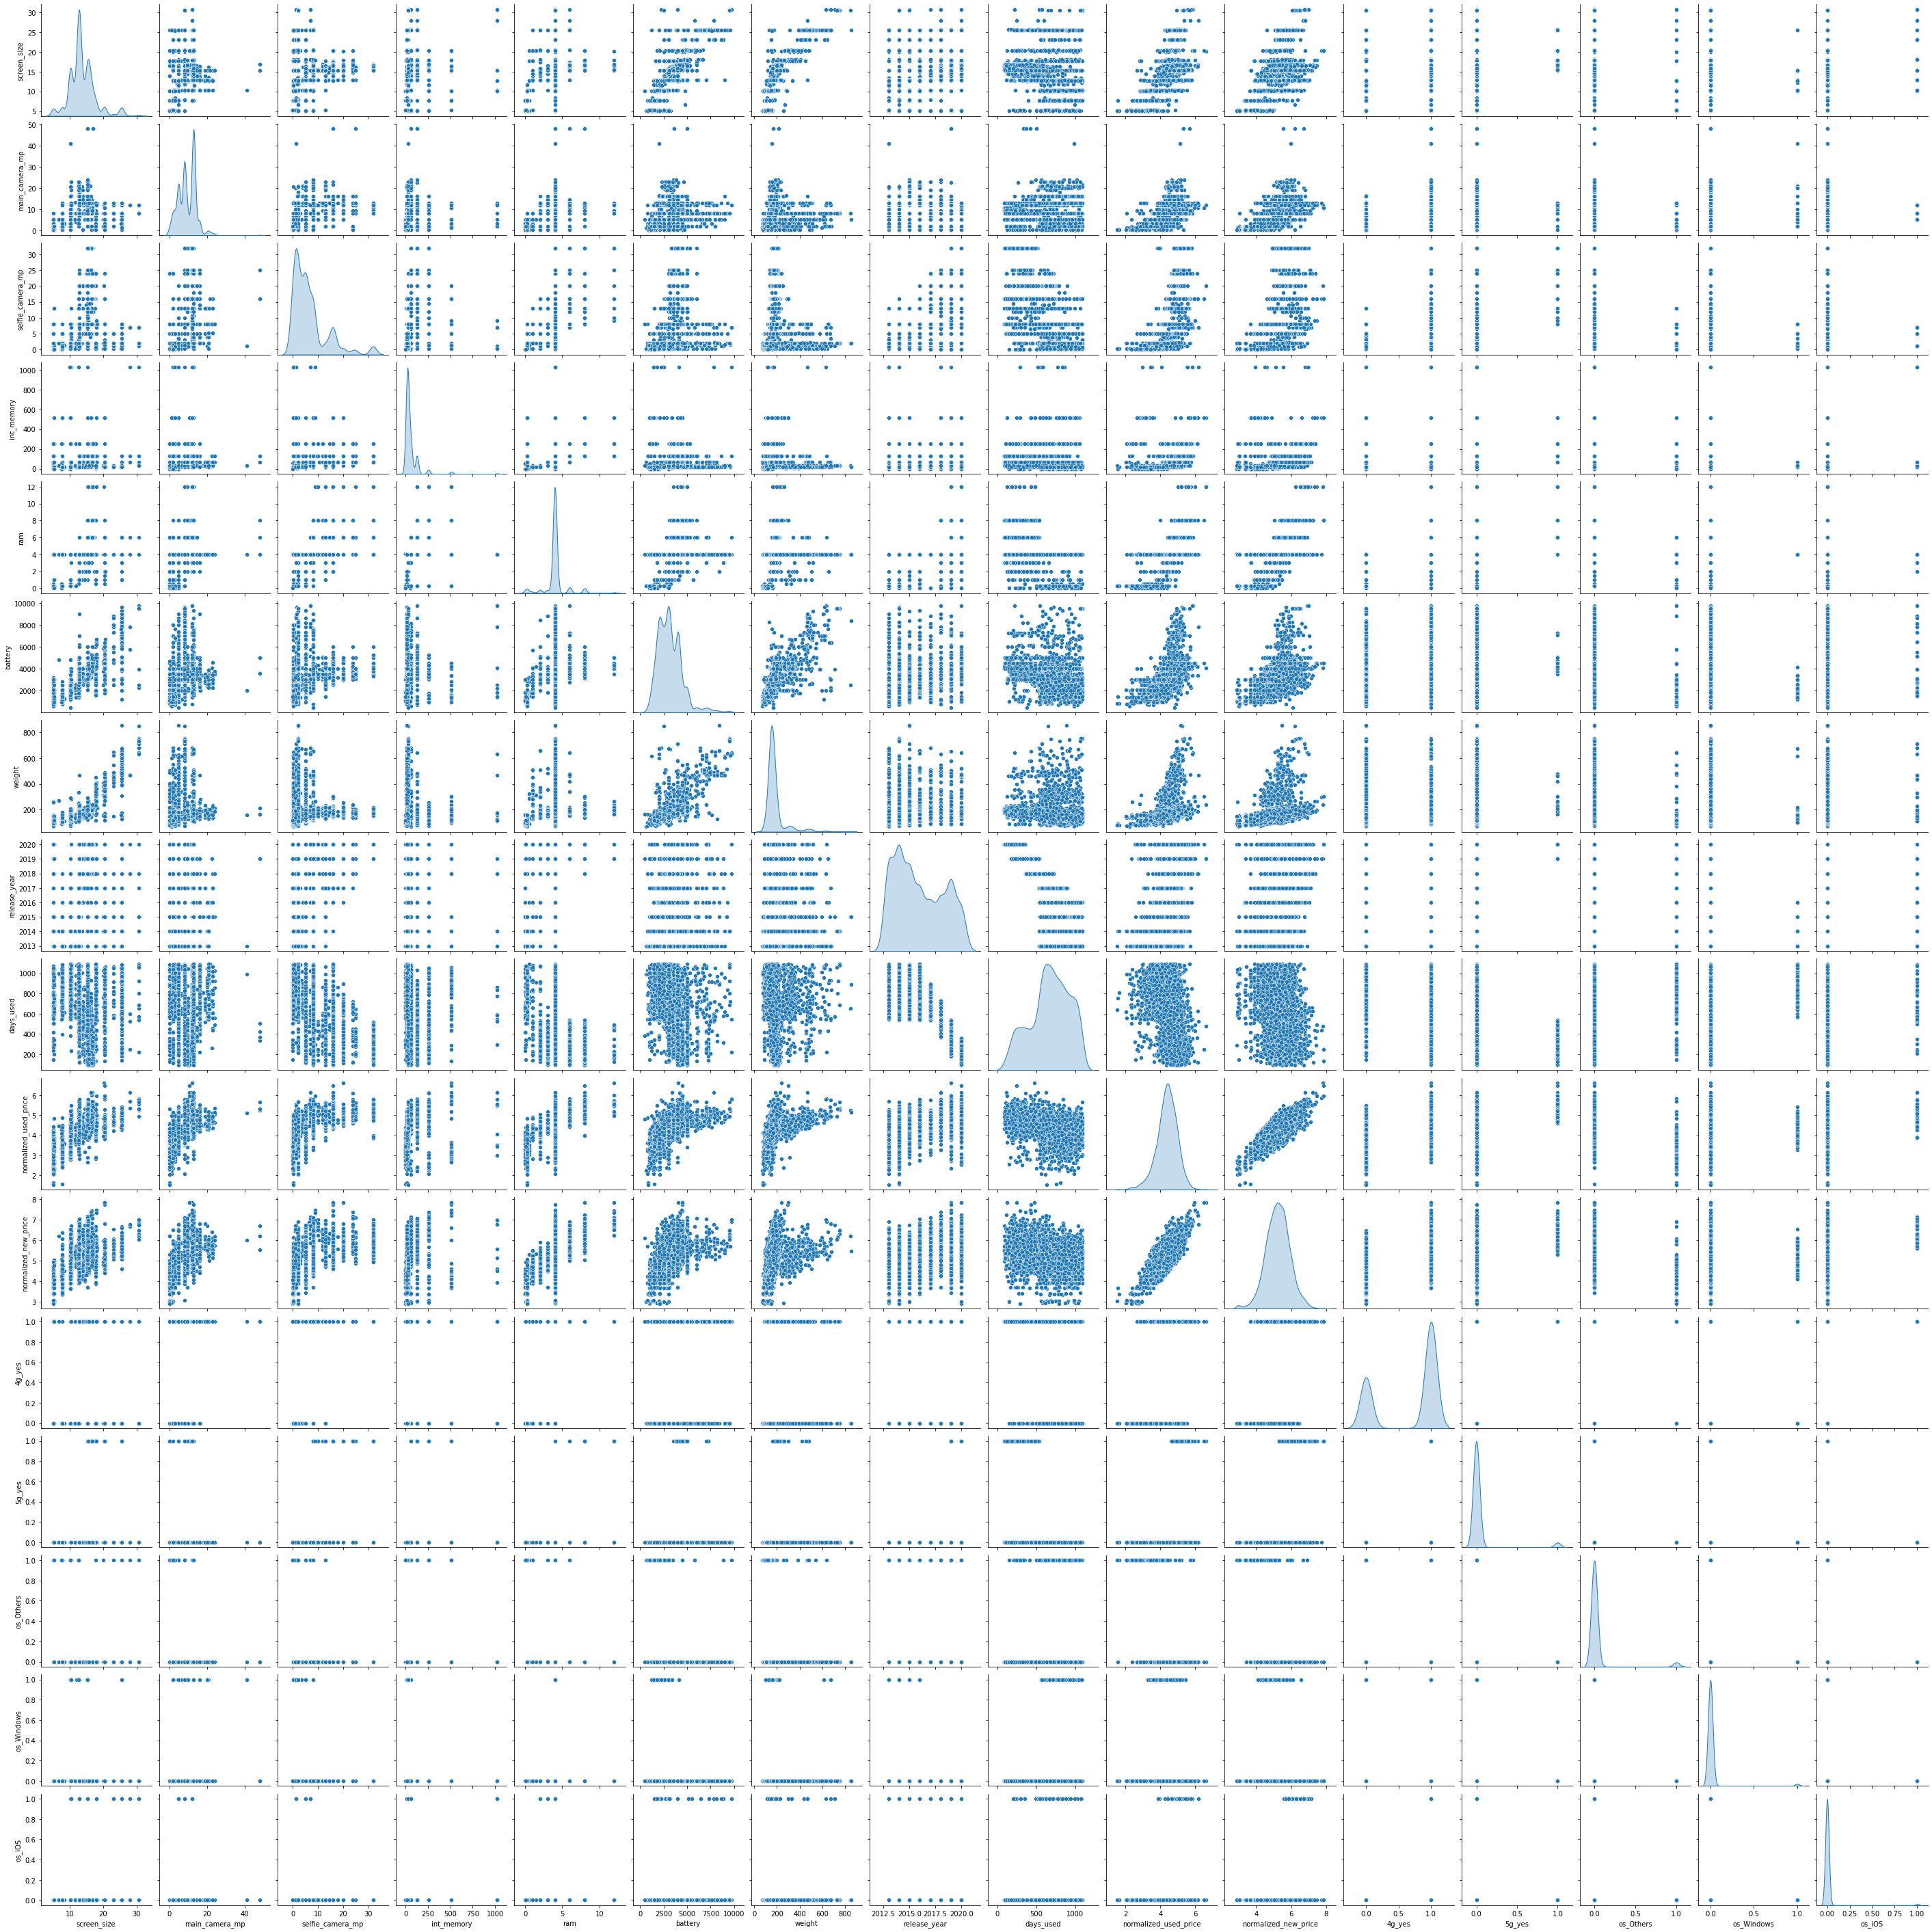

In [ ]:
df_attr2 = df_new.iloc[:, 0:19]
sns.pairplot(
    df_attr2, diag_kind="kde"
)

## Model Building - Linear Regression

In [ ]:
X = df_new.drop(['brand_name', 'normalized_used_price'],axis=1)
X = sm.add_constant(X)
y = df_new['normalized_used_price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

x_test.shape

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


(1037, 16)

In [ ]:
print(x_train.head())

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
3026    1.0        10.29             8.0               0.3        16.0  4.0   
1525    1.0        15.34            13.0               5.0        32.0  4.0   
1128    1.0        12.70            13.0               5.0        32.0  4.0   
3003    1.0        12.83             8.0               5.0        16.0  4.0   
2907    1.0        12.88            13.0              16.0        16.0  4.0   

      battery  weight  release_year  days_used  normalized_new_price  4g_yes  \
3026   1800.0   120.0          2014        819              4.796204       0   
1525   4050.0   225.0          2016        585              5.434595       1   
1128   2550.0   162.0          2015        727              5.137914       0   
3003   3200.0   160.0          2015        800              5.189228       1   
2907   2900.0   160.0          2017        560              5.016220       1   

      5g_yes  os_Others  os_Windows  os_iOS 

In [ ]:
used = sm.OLS(y_train, x_train)
olsused = used.fit()

In [ ]:
print(olsused.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     849.9
Date:                   Thu, 26 Jan 2023   Prob (F-statistic):               0.00
Time:                           15:45:15   Log-Likelihood:                 97.816
No. Observations:                   2417   AIC:                            -163.6
Df Residuals:                       2401   BIC:                            -70.99
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

We start off with an adjusted R squared value of 84.2. The high p value of some variables (i.e 5g, os_windows, os_ios, days_used) tell us that they may not be necessary for this regression model.

The next steps will be to assess the performance of the model starting with collinearity of the variables

## Model Performance Check

In [ ]:
# We start by checking the Variance Inflation factors for the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   3.574201e+06
screen_size             7.256652e+00
main_camera_mp          1.960575e+00
selfie_camera_mp        2.574157e+00
int_memory              1.248142e+00
ram                     2.103573e+00
battery                 3.841840e+00
weight                  6.133697e+00
release_year            4.617613e+00
days_used               2.586235e+00
normalized_new_price    2.656772e+00
4g_yes                  2.269103e+00
5g_yes                  1.749546e+00
os_Others               1.476351e+00
os_Windows              1.023186e+00
os_iOS                  1.089272e+00
dtype: float64



Our focus is on the variables exhibiting values higher than 5 (i.e Screen_size,weight,) for a start and subsequently other variabels higher than 2.5

In [ ]:
x_train2 = x_train.drop(["screen_size"], axis=1)
used_1 = sm.OLS(y_train, x_train2)
olsused_1 = used_1.fit()
print(
    "R-squared:",
    np.round(olsused_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsused_1.rsquared_adj, 3),
)

R-squared: 0.838 
Adjusted R-squared: 0.837


On dropping 'screen_size' adjusted R-squared decreased by 0.006

In [ ]:
x_train3 = x_train.drop(["weight"], axis=1)
used_2 = sm.OLS(y_train, x_train3)
olsused_2 = used_2.fit()
print(
    "R-squared:",
    np.round(olsused_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsused_2.rsquared_adj, 3),
)

R-squared: 0.838 
Adjusted R-squared: 0.837


On dropping 'weight' adjusted R-squared decreases by 0.006 as was with screen size. This shows that both variables are suitable candidates to be dropped

In [ ]:
x_train = x_train.drop(["screen_size"], axis=1)

In [ ]:
used_3 = sm.OLS(y_train, x_train)
olsused_3 = used_3.fit()
print(olsused_3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     885.7
Date:                   Thu, 26 Jan 2023   Prob (F-statistic):               0.00
Time:                           15:45:15   Log-Likelihood:                 69.317
No. Observations:                   2417   AIC:                            -108.6
Df Residuals:                       2402   BIC:                            -21.78
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series2 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                   3.457755e+06
main_camera_mp          1.956282e+00
selfie_camera_mp        2.569245e+00
int_memory              1.247544e+00
ram                     2.103042e+00
battery                 3.605400e+00
weight                  2.870512e+00
release_year            4.463520e+00
days_used               2.573138e+00
normalized_new_price    2.626801e+00
4g_yes                  2.268438e+00
5g_yes                  1.746493e+00
os_Others               1.256117e+00
os_Windows              1.023089e+00
os_iOS                  1.086872e+00
dtype: float64



Our next focus will be on release year

In [ ]:
x_train4 = x_train.drop(["release_year"], axis=1)
used_4 = sm.OLS(y_train, x_train4)
olsused_4 = used_4.fit()
print(
    "R-squared:",
    np.round(olsused_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsused_4.rsquared_adj, 3),
)

R-squared: 0.834 
Adjusted R-squared: 0.833


In [ ]:
x_train = x_train.drop(["release_year"], axis=1)

In [ ]:
used_5 = sm.OLS(y_train, x_train)
olsused_5 = used_5.fit()
print(olsused_5.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.833
Method:                    Least Squares   F-statistic:                     929.1
Date:                   Thu, 26 Jan 2023   Prob (F-statistic):               0.00
Time:                           15:45:15   Log-Likelihood:                 42.311
No. Observations:                   2417   AIC:                            -56.62
Df Residuals:                       2403   BIC:                             24.44
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series3 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const                   103.020324
main_camera_mp            1.948965
selfie_camera_mp          2.255926
int_memory                1.241142
ram                       2.098941
battery                   3.389779
weight                    2.850273
days_used                 1.728174
normalized_new_price      2.467714
4g_yes                    1.892357
5g_yes                    1.723191
os_Others                 1.255084
os_Windows                1.023007
os_iOS                    1.083092
dtype: float64



In [ ]:
x_train5 = x_train.drop(["battery"], axis=1)
used_6 = sm.OLS(y_train, x_train5)
olsused_6 = used_6.fit()
print(
    "R-squared:",
    np.round(olsused_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsused_6.rsquared_adj, 3),
)

R-squared: 0.834 
Adjusted R-squared: 0.833


In [ ]:
x_train = x_train.drop(["battery"], axis=1)

In [ ]:
used_7 = sm.OLS(y_train, x_train)
olsused_7 = used_7.fit()
print(olsused_7.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.833
Method:                    Least Squares   F-statistic:                     1005.
Date:                   Thu, 26 Jan 2023   Prob (F-statistic):               0.00
Time:                           15:45:16   Log-Likelihood:                 40.167
No. Observations:                   2417   AIC:                            -54.33
Df Residuals:                       2404   BIC:                             20.94
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series4 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series4))

VIF values: 

const                   102.025942
main_camera_mp            1.915482
selfie_camera_mp          2.211485
int_memory                1.241093
ram                       2.098471
weight                    1.246000
days_used                 1.638030
normalized_new_price      2.463121
4g_yes                    1.776814
5g_yes                    1.723184
os_Others                 1.251060
os_Windows                1.017565
os_iOS                    1.081178
dtype: float64



In [ ]:
x_train6 = x_train.drop(["normalized_new_price"], axis=1)
used_8 = sm.OLS(y_train, x_train6)
olsused_8 = used_8.fit()
print(
    "R-squared:",
    np.round(olsused_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsused_8.rsquared_adj, 3),
)

R-squared: 0.741 
Adjusted R-squared: 0.74


We attempted to get all the VIF lower than 2 by testing the effect the normalized new price had, we saw a 10% reduction telling us that this variable is important. 

At this point, we have all our VIFs approximately less than 2.5 so we can proceed to test other linear regression assumptions

In [ ]:
x_train.head()

,const,main_camera_mp,selfie_camera_mp,int_memory,ram,weight,days_used,normalized_new_price,4g_yes,5g_yes,os_Others,os_Windows,os_iOS
3026,1.0,8.0,0.3,16.0,4.0,120.0,819,4.796204,0,0,0,0,0
1525,1.0,13.0,5.0,32.0,4.0,225.0,585,5.434595,1,0,0,0,0
1128,1.0,13.0,5.0,32.0,4.0,162.0,727,5.137914,0,0,0,0,0
3003,1.0,8.0,5.0,16.0,4.0,160.0,800,5.189228,1,0,0,0,0
2907,1.0,13.0,16.0,16.0,4.0,160.0,560,5.016220,1,0,0,0,0


We still have some large p-values present for 5g_yes and os_windows. We will proceed to drop these predictors next.

In [ ]:
x_train7 = x_train.drop(["5g_yes"], axis=1)
used_9 = sm.OLS(y_train, x_train7)
olsused_9 = used_9.fit()
print(
    "R-squared:",
    np.round(olsused_9.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsused_9.rsquared_adj, 3),
)

R-squared: 0.834 
Adjusted R-squared: 0.833


No significant change, showing that 5g_yes predictor can be dropped

In [ ]:
x_train8 = x_train.drop(["os_Windows"], axis=1)
used_10 = sm.OLS(y_train, x_train8)
olsused_10 = used_10.fit()
print(
    "R-squared:",
    np.round(olsused_10.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsused_10.rsquared_adj, 3),
)

R-squared: 0.834 
Adjusted R-squared: 0.833


In [ ]:
x_train9 = x_train.drop(["os_iOS"], axis=1)
used_11 = sm.OLS(y_train, x_train9)
olsused_11 = used_11.fit()
print(
    "R-squared:",
    np.round(olsused_11.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsused_11.rsquared_adj, 3),
)

R-squared: 0.834 
Adjusted R-squared: 0.833


We can go ahead to drop all 3 variables now

In [ ]:
x_train = x_train.drop(["5g_yes"], axis=1)

In [ ]:
used_12 = sm.OLS(y_train, x_train)
olsused_12 = used_12.fit()
print(olsused_12.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.833
Method:                    Least Squares   F-statistic:                     1097.
Date:                   Thu, 26 Jan 2023   Prob (F-statistic):               0.00
Time:                           15:45:16   Log-Likelihood:                 40.138
No. Observations:                   2417   AIC:                            -56.28
Df Residuals:                       2405   BIC:                             13.21
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
x_train = x_train.drop(["os_Windows"], axis=1)

In [ ]:
used_13 = sm.OLS(y_train, x_train)
olsused_13 = used_13.fit()
print(olsused_13.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.833
Method:                    Least Squares   F-statistic:                     1207.
Date:                   Thu, 26 Jan 2023   Prob (F-statistic):               0.00
Time:                           15:45:16   Log-Likelihood:                 40.043
No. Observations:                   2417   AIC:                            -58.09
Df Residuals:                       2406   BIC:                             5.607
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
x_train = x_train.drop(["os_iOS"], axis=1)

In [ ]:
used_14 = sm.OLS(y_train, x_train)
olsused_14 = used_14.fit()
print(olsused_14.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.833
Method:                    Least Squares   F-statistic:                     1340.
Date:                   Thu, 26 Jan 2023   Prob (F-statistic):               0.00
Time:                           15:45:16   Log-Likelihood:                 39.109
No. Observations:                   2417   AIC:                            -58.22
Df Residuals:                       2407   BIC:                           -0.3148
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
used_16 = sm.OLS(y_train, x_train)
olsused_16 = used_16.fit()
print(olsused_16.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.833
Method:                    Least Squares   F-statistic:                     1340.
Date:                   Thu, 26 Jan 2023   Prob (F-statistic):               0.00
Time:                           15:45:16   Log-Likelihood:                 39.109
No. Observations:                   2417   AIC:                            -58.22
Df Residuals:                       2407   BIC:                           -0.3148
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

We can move forward to testing other assumptions of linear regression now as we have no high p values left.

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

In [ ]:
x_train10 = x_train.drop(["int_memory"], axis=1)
used_15 = sm.OLS(y_train, x_train10)
olsused_15 = used_15.fit()
print(
    "R-squared:",
    np.round(olsused_15.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsused_15.rsquared_adj, 3),
)

R-squared: 0.833 
Adjusted R-squared: 0.833


In [ ]:
x_train = x_train.drop(["int_memory"], axis=1)

## Checking Linear Regression Assumptions

These assumptions are essential conditions that should be met before we draw inferences regarding the model estimates or use the model to make a prediction.

For Linear Regression, we need to check if the following assumptions hold:

1. Linearity
2. Independence
3. Homcedacity
4. Normality of error terms
5. No strong Multicollinearity

In [ ]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()
df_pred["Fitted Values"] = olsused_16.fittedvalues.values
df_pred["Residuals"] = olsused_16.resid

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,4.087488,3.855946,0.081166
1,4.448399,4.619072,0.213346
2,4.315353,4.275382,0.134460
3,4.282068,4.266372,NaN
4,4.456438,4.529299,NaN


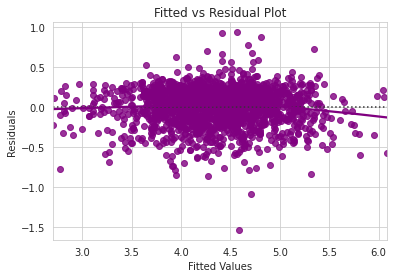

In [ ]:
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual Plot")
plt.show()

In [ ]:
x_train10.columns

Index(['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight',
       'days_used', 'normalized_new_price', '4g_yes', 'os_Others'],
      dtype='object')

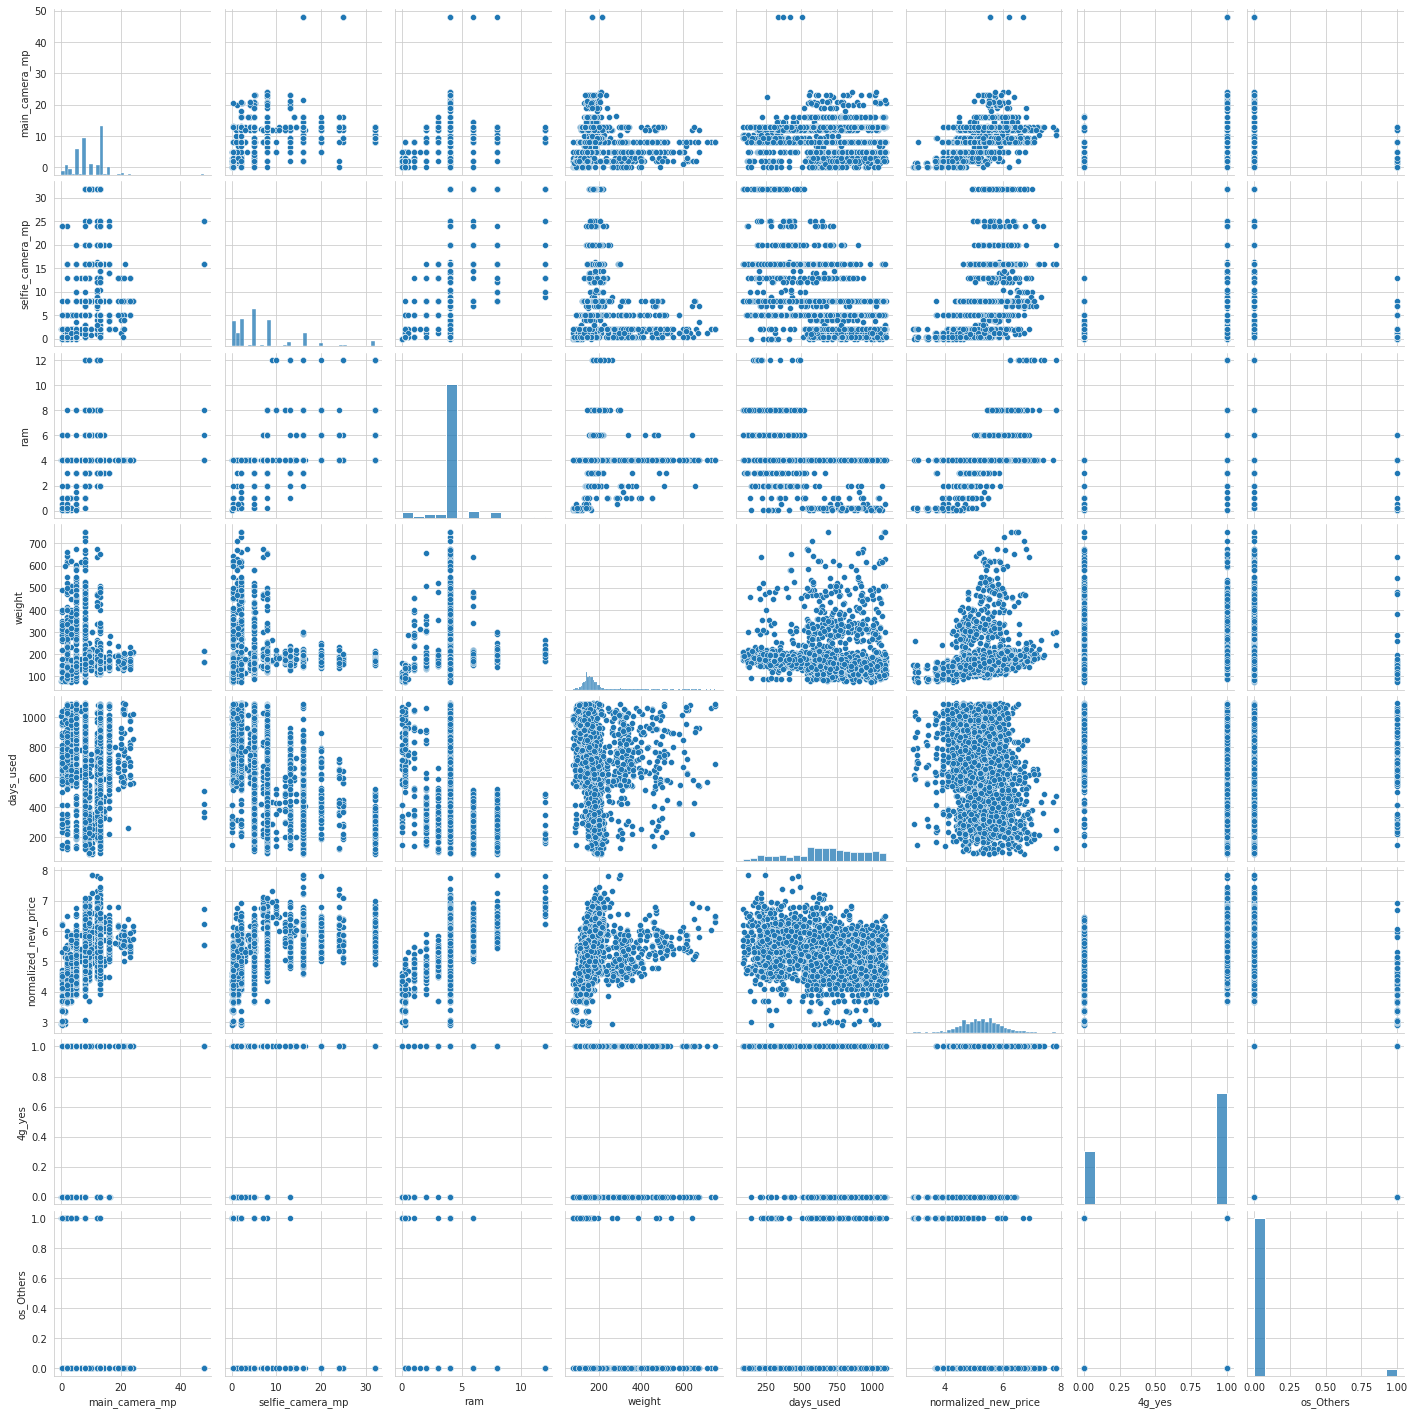

In [ ]:
sns.pairplot(x_train10[["main_camera_mp","selfie_camera_mp","ram","weight","days_used","normalized_new_price","4g_yes","os_Others"]])
plt.show()

## Test for Normality

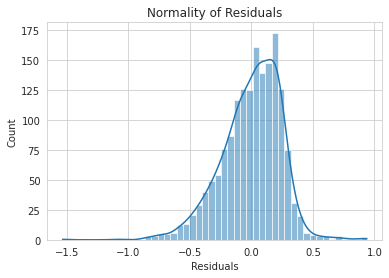

In [ ]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of Residuals")
plt.show()

Has a slightly right skewed but is normally distributed. We can try a QQ plot next

<function matplotlib.pyplot.show(*args, **kw)>

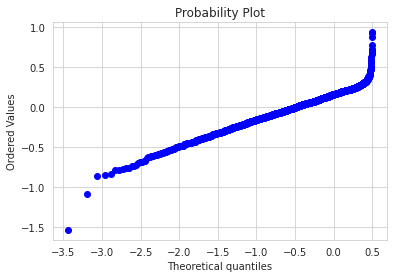

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show

The QQ plot shows majority of the points on the line plot. This is close to being normal

We can go a step further and use a Shapiro-Wilk test to check for normality. The null and alternate hypotheses of the test are as follows:

*   Null hypothesis - Data is normally distributed
*   Alternate hypothesis - Data is not normally distributed



In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=nan, pvalue=1.0)

This confirms that the data is normally distributed

# Test for Homscedasticity

We use the goldfeldquandt tests and the null/alternate hypotheses are as follows

*   Null Hypothesis: Residuals are homoscedastic
*   Alternate Hypothesis: Residuals have heteroscadasticity



In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [ ]:
name = ["F Statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train10)
lzip(name, test)

[('F Statistic', nan), ('p-value', nan)]

## Final Model

## Actionable Insights and Recommendations 

- 


___